## Trabalho Grafos Menor Caminho

Alunos: Gabriel Santos Arpini e Sabrina Santiago de Oliveira

O presente trabalho demonstra uma aplicação do Algoritmo de Dijkstra, foi escolhido utilizar um ambiente no Jupyter Notebook para facilitar a demonstração do processo de criação e ilustração.

Primeiro, é necessário importar alguns módulos que servirão para teste e demonstração da estrutura do grafo e o algoritmo, lembrando que é necessário baixar as dependências do arquivo `./requirements.txt`:

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

Agora, pode-se representar o grafo com a seguinte estrutura:

In [47]:
class Graph:
    # __init__ representa os valores e váriavies iniciais desta estrutura de dados
    def __init__ (self, tamanho, direcionado=False):
        self.matriz_adj = [[0] * tamanho for _ in range(tamanho)]
        self.tamanho = tamanho
        self.predecessores = [None] * self.tamanho 
        self.direcionado = direcionado
        self.dado = [''] * tamanho

    #adiciona uma aresta ao grafo
    def add_aresta(self, u, v, peso):
        self.matriz_adj[u][v] = peso
        if not self.direcionado:
            self.matriz_adj[v][u] = peso
            
    #Adiciona um dado ao vértice
    def add_dado_vertice(self,vertice, dado):
        self.dado[vertice] = dado
        
    #Algoritmo de Dijkstra
    def dijkstra(self,dado_vertice_inicial):
        vertice_inicial = self.dado.index(dado_vertice_inicial)
        distancias = [float('inf')] * self.tamanho #float('inf') é uma representação de infinito em Python.
        distancias[vertice_inicial] = 0
        visitado = [False] * self.tamanho
        for _ in range(self.tamanho):
            min_distancia = float("inf")
            u = None
            for i in range(self.tamanho):
                if not visitado[i] and distancias[i] < min_distancia:
                    min_distancia = distancias[i]
                    u = i
            if u is None:
                break

            visitado[u] = True
            
            #Relaxamento
            for v in range(self.tamanho):
                if self.matriz_adj[u][v] != 0 and not visitado[v]:
                    alt = distancias[u] + self.matriz_adj[u][v]
                    if alt < distancias[v]:
                        distancias[v] = alt
                        self.predecessores[v] = u

        return distancias, self.predecessores

    def reconstruir_caminho(self, dado_vertice_inicial, dado_vertice_final, predecessores):
        vertice_inicial = self.dado.index(dado_vertice_inicial)
        vertice_final = self.dado.index(dado_vertice_final)
        caminho = []
        atual = vertice_final
        
        while atual is not None:
            caminho.append(self.dado[atual])
            atual = predecessores[atual]
        
        caminho.reverse()  #Colocar na ordem correta
        
        if caminho[0] == dado_vertice_inicial:
            return caminho
        else:
            return None

    #Utiliza-se a biblioteca NetworkX para realizar a visualização
    def visualizar(self):
        G = nx.DiGraph() if self.direcionado else nx.Graph()

        #Adciona as arestas e pesos
        for u in range(self.tamanho):
            for v in range(self.tamanho):
                if self.matriz_adj[u][v] != 0:
                    G.add_edge(self.dado[u], self.dado[v], weight=self.matriz_adj[u][v])

        #Desenha o grafo
        pos = nx.spring_layout(G)  #Usa um algoritmo built-in da biblioteca NetworkX para posicionar os vértices
        nx.draw(G, pos, with_labels=True, node_color="lightblue", font_weight="bold", node_size=2000)

        #Adiciona nomes para as arestas
        nomes_arestas = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=nomes_arestas)

        plt.title("Vizualiação da estrutura do grafo")
        plt.show()


Com a estrutura de grafos feita, pode-se realizar alguns testes e verificar se funciona, primeiro cria-se a rotina de testes, a biblioteca ipytest foi feita especificamente para uso no Jupyter Notebook e executa todas as funções com `test_` no ínicio e retorna se os testes fora sucedidos ou não:

In [48]:
import ipytest
ipytest.autoconfig()

In [51]:
def test_matriz():
    # Teste matriz de adjacencia
    g = Graph(3)
    g.add_dado_vertice(0, 'A')
    g.add_dado_vertice(1, 'B')
    g.add_dado_vertice(2, 'C')
    
    g.add_aresta(0, 1, 5)
    g.add_aresta(1, 2, 3)
    assert g.matriz_adj[0][1] == 5
    assert g.matriz_adj[1][0] == 5
    assert g.matriz_adj[1][2] == 3
    assert g.matriz_adj[2][1] == 3
    assert g.matriz_adj[0][2] == 0

def test_dados_aresta():
    # Teste dos dados da aresta
    g = Graph(3)
    g.add_dado_vertice(0, 'A')
    g.add_dado_vertice(1, 'B')
    g.add_dado_vertice(2, 'C')
    
    g.add_aresta(0, 1, 5)
    g.add_aresta(1, 2, 3)
    assert g.dado == ['A', 'B', 'C']

def test_algoritmo():
    # Teste do algoritmo de Dijkstra
    g = Graph(3)
    g.add_dado_vertice(0, 'A')
    g.add_dado_vertice(1, 'B')
    g.add_dado_vertice(2, 'C')
    
    g.add_aresta(0, 1, 5)
    g.add_aresta(0, 2, 3)
    distances = g.dijkstra('A')
    assert distances,_ == [0, 5, 3]




Depois pode-se utilizar a biblioteca `ipytest` para realizar os testes após implementar uma estrutura de grafo arbitrária em cada unidade de teste para evitar erros devido a possíveis mudanças no futuro:

In [52]:
ipytest.run('-v')

======================================= test session starts ========================================
platform linux -- Python 3.12.5, pytest-8.3.4, pluggy-1.5.0
rootdir: /home/arpoca/Documents/TrabalhoGrafosJn
plugins: anyio-4.4.0
collected 3 items

t_0bc2759c57394376a8bafa4cbf7a7412.py ...                                                    [100%]

======================================== 3 passed in 0.01s =========================================


<ExitCode.OK: 0>

Com os testes realizados, já podemos visualizar o grafo, primeiro criamos uma função para manter uma estrutura de grafos maior e depois chamamos a função `visualizar`:

In [55]:
def representacao_1():
    g = Graph(7)
    g.add_dado_vertice(0,'A')
    g.add_dado_vertice(1, 'B')
    g.add_dado_vertice(2, 'C')
    g.add_dado_vertice(3, 'D')
    g.add_dado_vertice(4, 'E')
    g.add_dado_vertice(5, 'F')
    g.add_dado_vertice(6,'G')

    g.add_aresta(3,0,4)
    g.add_aresta(3, 4, 2)
    g.add_aresta(0, 2, 3)
    g.add_aresta(0, 4, 4)
    g.add_aresta(4, 2, 4)
    g.add_aresta(4, 6, 5)
    g.add_aresta(2, 5, 5)
    g.add_aresta(2, 1, 2)
    g.add_aresta(1, 5, 2)
    g.add_aresta(6, 5, 5)

    print("Algoritmo de Dijkstra da vertice D:")
    distancias, predecessores = g.dijkstra('D')
    for i, d in enumerate(distancias):
        caminho = g.reconstruir_caminho('D', g.dado[i], predecessores)
        if caminho:
            print(f"  Caminho: {' -> '.join(caminho)}")
        else:
            print("Não há um caminho")
    g.visualizar()

Algoritmo de Dijkstra da vertice D:
  Caminho: D -> A
  Caminho: D -> E -> C -> B
  Caminho: D -> E -> C
  Caminho: D
  Caminho: D -> E
  Caminho: D -> E -> C -> B -> F
  Caminho: D -> E -> G


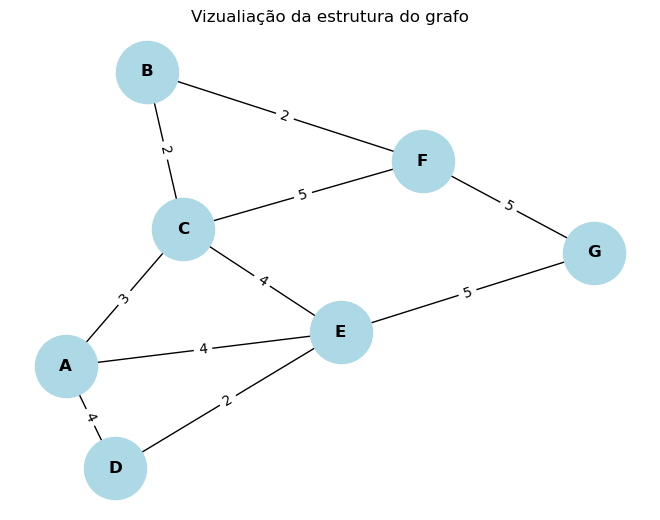

In [56]:
representacao_1()